In [2]:
from my_functions import *

import pandas as pd
import numpy as np
import networkx as nx
from pprint import pprint

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [22]:
df: pd.DataFrame = pd.read_csv('Archivos/Subject00/csv/Subject00_1.csv', sep=';')

df = np.transpose(df)
df.columns = CHANNELS

display(df.corr(), np.sqrt(2*(1 - df.corr())))

,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
Fp1,1.000000,0.934770,0.925696,0.865536,0.611838,0.754611,0.428443,0.428932,0.673122,0.667798,0.150640,0.028052,0.292105,0.156538,0.015742,-0.184683,0.865648,0.676511,0.291741
Fp2,0.934770,1.000000,0.764401,0.831179,0.488979,0.761121,0.292107,0.423059,0.544602,0.605387,0.063625,0.066901,0.207322,0.154852,-0.035255,-0.159631,0.831842,0.569610,0.230074
F3,0.925696,0.764401,1.000000,0.816772,0.596539,0.629622,0.429035,0.475463,0.731825,0.679280,0.219881,0.088687,0.336892,0.231524,0.044773,-0.138810,0.834020,0.701509,0.354772
F4,0.865536,0.831179,0.816772,1.000000,0.508447,0.735990,0.335230,0.538910,0.624308,0.731591,0.143040,0.143229,0.291285,0.253038,0.030957,-0.106164,0.941251,0.671197,0.320911
F7,0.611838,0.488979,0.596539,0.508447,1.000000,0.412390,0.334690,0.260938,0.464262,0.394966,0.102571,0.004410,0.194612,0.080509,-0.018995,-0.154577,0.511843,0.405079,0.172486
F8,0.754611,0.761121,0.629622,0.735990,0.412390,1.000000,0.221961,0.429680,0.474793,0.564996,0.028563,0.133597,0.187935,0.196880,-0.000456,-0.098009,0.748711,0.503010,0.238654
T3,0.428443,0.292107,0.429035,0.335230,0.334690,0.221961,1.000000,0.342658,0.589535,0.440658,0.554805,0.158176,0.588918,0.322600,0.298933,0.032305,0.341100,0.424516,0.479727
T4,0.428932,0.423059,0.475463,0.538910,0.260938,0.429680,0.342658,1.000000,0.525030,0.859688,0.344008,0.850169,0.543240,0.824333,0.418627,0.424463,0.536561,0.591755,0.673081
C3,0.673122,0.544602,0.731825,0.624308,0.464262,0.474793,0.589535,0.525030,1.000000,0.716830,0.418020,0.241109,0.637078,0.453724,0.322404,0.072278,0.620980,0.672522,0.612189
C4,0.667798,0.605387,0.679280,0.731591,0.394966,0.564996,0.440658,0.859688,0.716830,1.000000,0.298777,0.530274,0.595375,0.682318,0.363636,0.236387,0.730035,0.746723,0.688002


,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
Fp1,0.000000,0.361194,0.385497,0.518582,0.881093,0.700555,1.069165,1.068707,0.808551,0.815110,1.303349,1.394237,1.189870,1.298816,1.403038,1.539274,0.518366,0.804350,1.190176
Fp2,0.361194,0.000000,0.686438,0.581070,1.010961,0.691200,1.189868,1.074189,0.954357,0.888384,1.368485,1.366088,1.259109,1.300114,1.438927,1.522912,0.579928,0.927782,1.240908
F3,0.385497,0.686438,0.000000,0.605356,0.898289,0.860672,1.068611,1.024243,0.732359,0.800900,1.249094,1.350047,1.151615,1.239739,1.382192,1.509178,0.576160,0.772646,1.135983
F4,0.518582,0.581070,0.605356,0.000000,0.991517,0.726649,1.153057,0.960302,0.866825,0.732679,1.309168,1.309023,1.190559,1.222262,1.392152,1.487390,0.342778,0.810929,1.165409
F7,0.881093,1.010961,0.898289,0.991517,0.000000,1.084076,1.153525,1.215781,1.035121,1.100031,1.339723,1.411092,1.269164,1.356091,1.427582,1.519590,0.988087,1.090799,1.286479
F8,0.700555,0.691200,0.860672,0.726649,1.084076,0.000000,1.247429,1.068008,1.024897,0.932742,1.393870,1.316361,1.274414,1.267375,1.414536,1.481897,0.708927,0.996986,1.233974
T3,1.069165,1.189868,1.068611,1.153057,1.153525,1.247429,0.000000,1.146596,0.906052,1.057678,0.943605,1.297555,0.906732,1.163959,1.184118,1.391183,1.147955,1.072832,1.020072
T4,1.068707,1.074189,1.024243,0.960302,1.215781,1.068008,1.146596,0.000000,0.974649,0.529740,1.145418,0.547414,0.955783,0.592734,1.078307,1.072881,0.962745,0.903598,0.808603
C3,0.808551,0.954357,0.732359,0.866825,1.035121,1.024897,0.906052,0.974649,0.000000,0.752555,1.078870,1.231983,0.851965,1.045252,1.164127,1.362147,0.870654,0.809293,0.880694
C4,0.815110,0.888384,0.800900,0.732679,1.100031,0.932742,1.057678,0.529740,0.752555,0.000000,1.184249,0.969254,0.899583,0.797097,1.128152,1.235810,0.734799,0.711726,0.789934


In [3]:
get_distances('Archivos/Subject00/csv/Subject00_1.csv')

,Fp1,Fp2,F3,F4,F7,F8,T3,T4,C3,C4,T5,T6,P3,P4,O1,O2,Fz,Cz,Pz
Fp1,0.000000,0.361194,0.385497,0.518582,0.881093,0.700555,1.069165,1.068707,0.808551,0.815110,1.303349,1.394237,1.189870,1.298816,1.403038,1.539274,0.518366,0.804350,1.190176
Fp2,0.361194,0.000000,0.686438,0.581070,1.010961,0.691200,1.189868,1.074189,0.954357,0.888384,1.368485,1.366088,1.259109,1.300114,1.438927,1.522912,0.579928,0.927782,1.240908
F3,0.385497,0.686438,0.000000,0.605356,0.898289,0.860672,1.068611,1.024243,0.732359,0.800900,1.249094,1.350047,1.151615,1.239739,1.382192,1.509178,0.576160,0.772646,1.135983
F4,0.518582,0.581070,0.605356,0.000000,0.991517,0.726649,1.153057,0.960302,0.866825,0.732679,1.309168,1.309023,1.190559,1.222262,1.392152,1.487390,0.342778,0.810929,1.165409
F7,0.881093,1.010961,0.898289,0.991517,0.000000,1.084076,1.153525,1.215781,1.035121,1.100031,1.339723,1.411092,1.269164,1.356091,1.427582,1.519590,0.988087,1.090799,1.286479
F8,0.700555,0.691200,0.860672,0.726649,1.084076,0.000000,1.247429,1.068008,1.024897,0.932742,1.393870,1.316361,1.274414,1.267375,1.414536,1.481897,0.708927,0.996986,1.233974
T3,1.069165,1.189868,1.068611,1.153057,1.153525,1.247429,0.000000,1.146596,0.906052,1.057678,0.943605,1.297555,0.906732,1.163959,1.184118,1.391183,1.147955,1.072832,1.020072
T4,1.068707,1.074189,1.024243,0.960302,1.215781,1.068008,1.146596,0.000000,0.974649,0.529740,1.145418,0.547414,0.955783,0.592734,1.078307,1.072881,0.962745,0.903598,0.808603
C3,0.808551,0.954357,0.732359,0.866825,1.035121,1.024897,0.906052,0.974649,0.000000,0.752555,1.078870,1.231983,0.851965,1.045252,1.164127,1.362147,0.870654,0.809293,0.880694
C4,0.815110,0.888384,0.800900,0.732679,1.100031,0.932742,1.057678,0.529740,0.752555,0.000000,1.184249,0.969254,0.899583,0.797097,1.128152,1.235810,0.734799,0.711726,0.789934


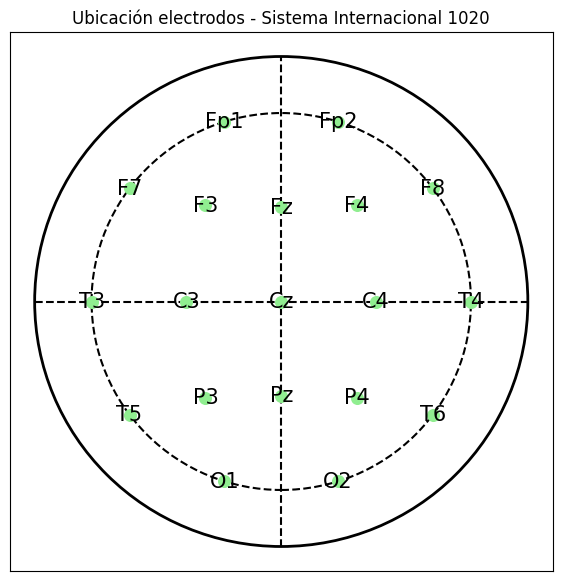

In [24]:
# Hacer una gráfica donde se vea la ubicación de los nodos (No es exacta - El montaje del sistema 1020)

fig, ax = plt.subplots(figsize=(7, 7))

ax.add_patch(Circle((0, 0), radius=1, color='black', fill=False, linestyle='--', linewidth=1.5))
ax.add_patch(Circle((0, 0), radius=1.3, color='black', fill=False, linewidth=2))

# Agregar segmentos
ax.plot([0, 0], [-1.3, 1.3], linestyle='--', color='black', linewidth=1.5)
ax.plot([-1.3, 1.3], [0, 0], linestyle='--', color='black', linewidth=1.5)

G = nx.Graph()
G.add_nodes_from(CHANNELS)

nx.draw_networkx(
    G,
    pos,
    node_size=70,
    with_labels=True,
    font_size=15,
    node_color='lightgreen'
)

ax.set_title('Ubicación electrodos - Sistema Internacional 1020')
plt.show()

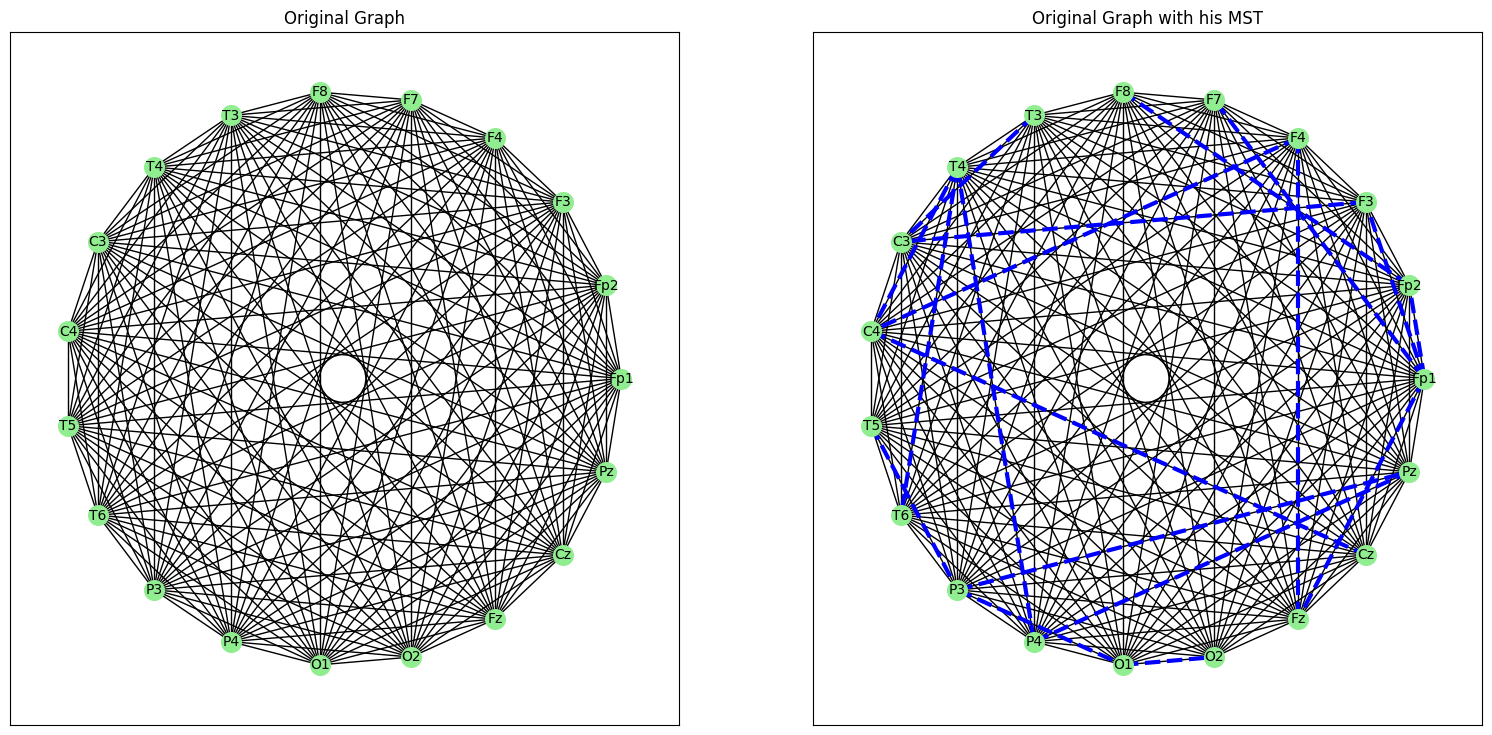

In [25]:
# mst sujeto00 antes

g0 = get_graph('Archivos\\Subject00\\csv\\Subject00_1.csv')
mst_g0 = nx.minimum_spanning_tree(g0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(19, 9))

# Dibujar el grafo original
ax1.set_title('Original Graph')
nx.draw_networkx(
    g0, pos=nx.circular_layout(g0), with_labels=True, 
    node_size=200, node_color="lightgreen", 
    font_size=10, font_color="black",
    ax=ax1
)

# Dibujar la MST del grafo original
ax2.set_title("Original Graph with his MST")

nx.draw_networkx(
    g0, pos=nx.circular_layout(g0), with_labels=True, 
    node_size=200, node_color="lightgreen", 
    font_size=10, font_color="black",
    ax=ax2
)

# Dibujarle las lineas de las aristas
edges_mst = [(u, v) for u, v in mst_g0.edges]
nx.draw_networkx_edges(
    mst_g0, pos=nx.circular_layout(g0), edgelist=edges_mst,
    edge_color="blue", style="dashed", width=3,
    ax=ax2
)

plt.show()

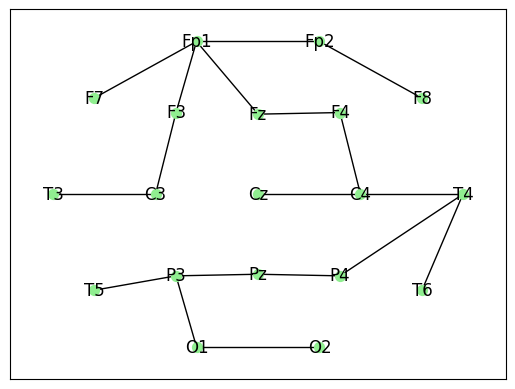

In [26]:
mst_g1 = get_mst('Archivos\\Subject00\\csv\\Subject00_1.csv')
nx.draw_networkx(
    mst_g1,
    pos,
    node_size=50,
    node_color='lightgreen'
)

In [27]:
density = nx.density(mst_g0)
ave_clustering = nx.average_clustering(mst_g0)

print(f'Density: {density}')
print(f'Average clustering: {ave_clustering}\n')

degree_centrality = nx.degree_centrality(mst_g0)
print('Degree centrality:')
pprint(sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

betweenness_centrality = nx.betweenness_centrality(mst_g0)
print('\nBetweenness centrality')
pprint(sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

closeness_centrality = nx.closeness_centrality(mst_g0)
print('\nClossenes centrality')
pprint(sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5])

pagerank = nx.pagerank(mst_g0, alpha=0.85, personalization=None, max_iter=100, tol=1e-06, nstart=None, weight='weight', dangling=None)
print('\nPagerank')
pprint(sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5])

Density: 0.10526315789473684
Average clustering: 0.0

Degree centrality:
[('Fp1', 0.2222222222222222),
 ('T4', 0.16666666666666666),
 ('C4', 0.16666666666666666),
 ('P3', 0.16666666666666666),
 ('Fp2', 0.1111111111111111)]

Betweenness centrality
[('C4', 0.5816993464052288),
 ('Fp1', 0.542483660130719),
 ('T4', 0.542483660130719),
 ('F4', 0.5228758169934641),
 ('Fz', 0.5032679738562091)]

Clossenes centrality
[('C4', 0.2857142857142857),
 ('F4', 0.28125),
 ('T4', 0.2727272727272727),
 ('Fz', 0.26865671641791045),
 ('Fp1', 0.25)]

Pagerank
[('Fp1', 0.09149770068455913),
 ('C4', 0.08444884743931488),
 ('P3', 0.08163972880765996),
 ('T4', 0.07444660175713706),
 ('C3', 0.06886785408619195)]


In [28]:
# Datos para sacar los diagrama de barras para cada medida de centralidad
df_centrality = pd.DataFrame({
    'nodes': CHANNELS,
    'degree': degree_centrality.values(),
    'betweenness': betweenness_centrality.values(),
    'closeness': closeness_centrality.values(),
    'pagerank': pagerank.values()
})

df_centrality

,nodes,degree,betweenness,closeness,pagerank
0,Fp1,0.222222,0.542484,0.250000,0.091498
1,Fp2,0.111111,0.111111,0.206897,0.052705
2,F3,0.111111,0.209150,0.211765,0.048032
3,F4,0.111111,0.522876,0.281250,0.047958
4,F7,0.055556,0.000000,0.202247,0.039825
5,F8,0.055556,0.000000,0.173077,0.037318
6,T3,0.055556,0.000000,0.153846,0.040268
7,T4,0.166667,0.542484,0.272727,0.074447
8,C3,0.111111,0.111111,0.180000,0.068868
9,C4,0.166667,0.581699,0.285714,0.084449
